# MOVIE REVIEW SENTIMENT CLASSIFICATION 

In this project, we aim to develop a sentiment analysis model for movie reviews. The goal is to accurately classify movie reviews as either positive or negative, enabling users to gauge public sentiment about specific movies. This analysis will provide valuable insights for movie producers, distributors, and marketers to understand audience preferences and tailor their strategies accordingly.

In the context of the CRISP-DM framework, the sentiment analysis model for movie reviews serves as a crucial component in the film industry's data-driven decision-making process. By leveraging the CRISP-DM stages, we aim to extract actionable insights from movie reviews, enabling stakeholders to make informed decisions and tailor their strategies effectively. The application of the CRISP-DM framework in the movie review sentiment analysis is as follows:

1. **Business Understanding Phase:** This stage involves defining the primary objective of developing a sentiment analysis model for movie reviews. By aligning the model's purpose with the overall business objectives, we ensure that it contributes directly to understanding audience sentiments and preferences, thus guiding strategic decision-making within the film industry.

2. **Data Understanding and Data Preparation Phases:** These stages revolve around acquiring and exploring large datasets of movie reviews. By implementing data preprocessing techniques, including text normalization and cleaning, we aim to structure the data for the subsequent modeling phase. The preprocessing step, such as stopword removal and lemmatization, ensures that the sentiment analysis model receives high-quality, standardized data for training and evaluation.

3. **Modeling Phase:** Within the CRISP-DM framework, the modeling phase focuses on employing machine learning algorithms and natural language processing techniques to build and train the sentiment analysis model. By integrating data classification models, we aim to accurately classify movie reviews as positive or negative, thus enabling stakeholders to extract meaningful insights from the data.

4. **Evaluation and Deployment Phases:** These stages encompass the evaluation of the sentiment analysis model's performance metrics and its subsequent deployment for stakeholders' use. By assessing the model's predictive capabilities and its alignment with business objectives, we ensure that it provides actionable insights for enhancing marketing strategies, audience perception, and investment decision-making within the film industry.

By incorporating the CRISP-DM framework into the movie review sentiment analysis, we aim to facilitate a structured and systematic approach to understanding audience sentiments and preferences, enabling stakeholders to make data-driven decisions effectively.

### Hypothesis 

1. Is there a significant difference in the average word count between positive and negative reviews?

2. Is there a significant association between sentiment (positive) and the presence of specific words like "amazing," "great," and "interesting" in movie reviews?

3. Is there a significant association between sentiment (negative) and the presence of specific words like "terrible," "bad," and "boring" in movie reviews?


### Questions 

1. What is the distribution of sentiment labels in the movie reviews dataset, and how are they distributed among different sentiment categories?

2. What does the distribution of word counts in movie reviews reveal about the length of reviews in the dataset?

3. How does the word count of movie reviews relate to their sentiment? Is there a noticeable difference in word count between positive and negative reviews?

## Installation of libraries

In [1]:
# !pip install spacy
# !pip install gradio
# !python -m spacy download en_core_web_sm
# !pip install wordcloud

## Importation of libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import string
import pickle
import os
import shutil
from collections import Counter
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
import scipy.stats as stats
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.base import TransformerMixin 
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC  
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## Data Collection & Loading

In [3]:
data = pd.read_csv('C:\\Users\\Israel Anaba\\Desktop\\Movie_Review_Analysis\\Assets\\Train.csv')

In [4]:
data

,review_file,content,sentiment
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive
1,9693_8.txt,I was very surprised with this film. I was tou...,positive
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive
...,...,...,...
24995,2791_3.txt,"As with most of the reviewers, I saw this on S...",negative
24996,644_9.txt,A have a female friend who is currently being ...,positive
24997,4921_8.txt,Like A Streetcar Named Desire (also directed b...,positive
24998,5791_1.txt,"As a Native film professor, I can honestly say...",negative


In [5]:
data.shape

(25000, 3)

In [6]:
data.info

<bound method DataFrame.info of        review_file                                            content  \
0       3471_8.txt  Recently shown on cable tv the movie opens wit...   
1       9693_8.txt  I was very surprised with this film. I was tou...   
2      10801_1.txt  Now, I'm one to watch movies that got poor rev...   
3       9592_8.txt  This film came out 12 years years ago, and was...   
4       8514_7.txt  When an orphanage manager goes on vacation, hi...   
...            ...                                                ...   
24995   2791_3.txt  As with most of the reviewers, I saw this on S...   
24996    644_9.txt  A have a female friend who is currently being ...   
24997   4921_8.txt  Like A Streetcar Named Desire (also directed b...   
24998   5791_1.txt  As a Native film professor, I can honestly say...   
24999  8997_10.txt  I've seen this movie on several different occa...   

      sentiment  
0      positive  
1      positive  
2      negative  
3      positive  
4

In [7]:
data.describe

<bound method NDFrame.describe of        review_file                                            content  \
0       3471_8.txt  Recently shown on cable tv the movie opens wit...   
1       9693_8.txt  I was very surprised with this film. I was tou...   
2      10801_1.txt  Now, I'm one to watch movies that got poor rev...   
3       9592_8.txt  This film came out 12 years years ago, and was...   
4       8514_7.txt  When an orphanage manager goes on vacation, hi...   
...            ...                                                ...   
24995   2791_3.txt  As with most of the reviewers, I saw this on S...   
24996    644_9.txt  A have a female friend who is currently being ...   
24997   4921_8.txt  Like A Streetcar Named Desire (also directed b...   
24998   5791_1.txt  As a Native film professor, I can honestly say...   
24999  8997_10.txt  I've seen this movie on several different occa...   

      sentiment  
0      positive  
1      positive  
2      negative  
3      positive  

In [8]:
data.isna().sum()

review_file    0
content        0
sentiment      0
dtype: int64

In [9]:
print(f'Columns Names: {list(data.columns)}')

Columns Names: ['review_file', 'content', 'sentiment']


In [87]:
test_data = pd.read_csv('C:\\Users\\Israel Anaba\\Desktop\\Movie_Review_Analysis\\Assets\\Test.csv')

In [88]:
test_data

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."
...,...,...
24995,999_8.txt,"From the start of ""The Edge Of Love"", the view..."
24996,99_10.txt,"This movie, with all its complexity and subtle..."
24997,99_3.txt,Four things intrigued me as to this film - fir...
24998,9_4.txt,David Bryce's comments nearby are exceptionall...


In [13]:
data.info

<bound method DataFrame.info of        review_file                                            content  \
0       3471_8.txt  Recently shown on cable tv the movie opens wit...   
1       9693_8.txt  I was very surprised with this film. I was tou...   
2      10801_1.txt  Now, I'm one to watch movies that got poor rev...   
3       9592_8.txt  This film came out 12 years years ago, and was...   
4       8514_7.txt  When an orphanage manager goes on vacation, hi...   
...            ...                                                ...   
24995   2791_3.txt  As with most of the reviewers, I saw this on S...   
24996    644_9.txt  A have a female friend who is currently being ...   
24997   4921_8.txt  Like A Streetcar Named Desire (also directed b...   
24998   5791_1.txt  As a Native film professor, I can honestly say...   
24999  8997_10.txt  I've seen this movie on several different occa...   

      sentiment  
0      positive  
1      positive  
2      negative  
3      positive  
4

In [14]:
data.rename(columns={'content': 'review'}, inplace=True)

In [15]:
data.drop('review_file', axis=1, inplace=True)

In [16]:
data

,review,sentiment
0,Recently shown on cable tv the movie opens wit...,positive
1,I was very surprised with this film. I was tou...,positive
2,"Now, I'm one to watch movies that got poor rev...",negative
3,"This film came out 12 years years ago, and was...",positive
4,"When an orphanage manager goes on vacation, hi...",positive
...,...,...
24995,"As with most of the reviewers, I saw this on S...",negative
24996,A have a female friend who is currently being ...,positive
24997,Like A Streetcar Named Desire (also directed b...,positive
24998,"As a Native film professor, I can honestly say...",negative


## EDA

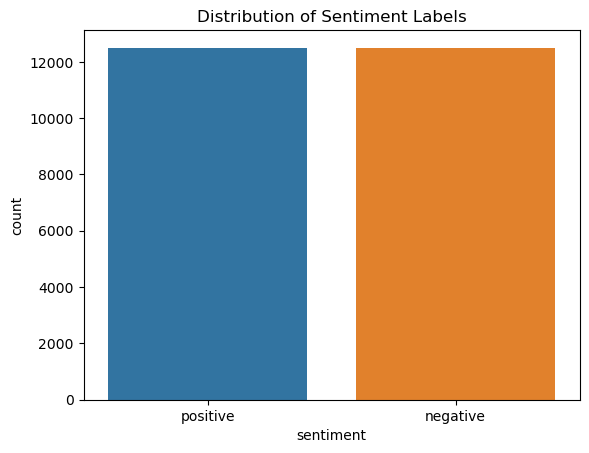

In [17]:
# Distribution of sentiment labels
sns.countplot(x='sentiment', data=data)
plt.title('Distribution of Sentiment Labels')
plt.show()

In [18]:
# Count the number of each sentiment label
sentiment_count = data['sentiment'].value_counts()

print(sentiment_count)

positive    12500
negative    12500
Name: sentiment, dtype: int64


#### Observation - The distribution of both classes (Positive & Negative) are evenly matched. This confirms that the class is balance and no need for a balancing the data to mitigate a class imbalance.

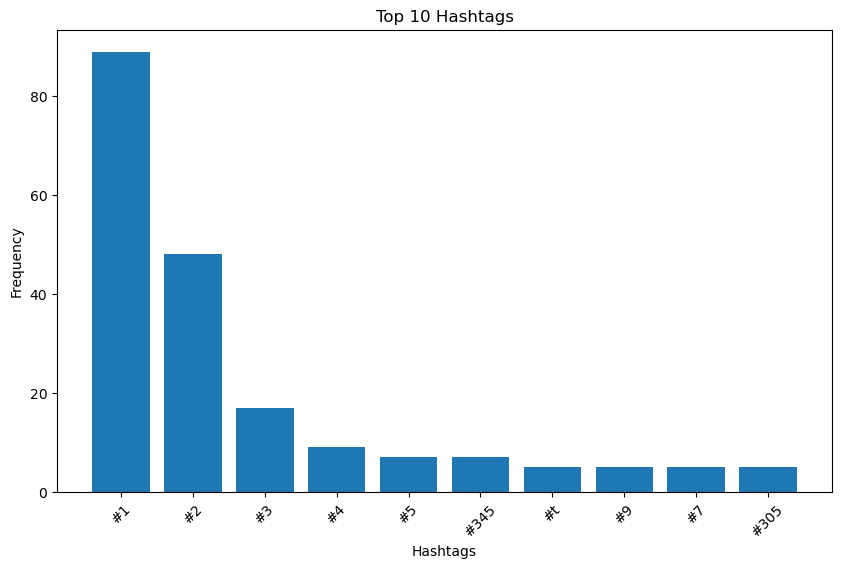

In [19]:
hashtags = data['review'].str.findall(r'#\w+')
hashtags = [item for sublist in hashtags for item in sublist]
hashtag_freq = Counter(hashtags)

# Get the top 10 hashtags
top_10_hashtags = dict(hashtag_freq.most_common(10))

plt.figure(figsize=(10, 6))
plt.bar(top_10_hashtags.keys(), top_10_hashtags.values())
plt.xlabel('Hashtags')
plt.ylabel('Frequency')
plt.title('Top 10 Hashtags')
plt.xticks(rotation=45)
plt.show()

#### Observation - The hashtags featured in the dataset is numeric. They could likely be consumers numbering their reviews.

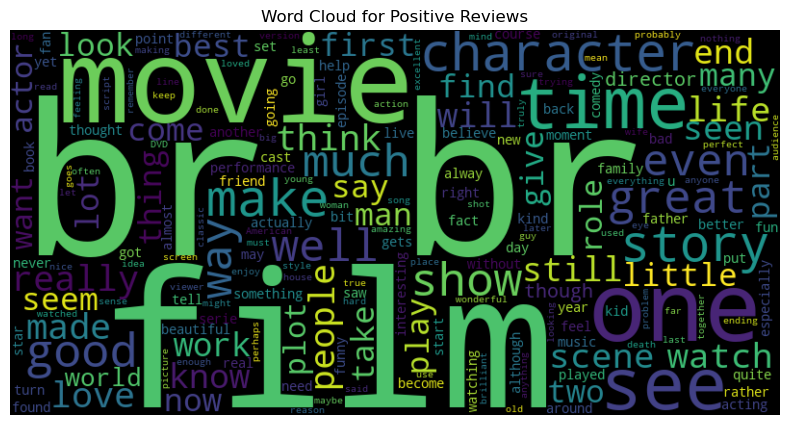

In [20]:
# Word cloud for positive reviews
positive_reviews = data[data['sentiment'] == 'positive']['review']
positive_text = ' '.join(positive_reviews)
positive_wordcloud = WordCloud(width=800, height=400).generate(positive_text)
plt.figure(figsize=(10, 5))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

#### Observation - This is a visual of the some of the most prevalent words in the Positive class. Words like : movie, watch director featured heavily. These terms are closely related to the domain of movies in relation to the Positive class.

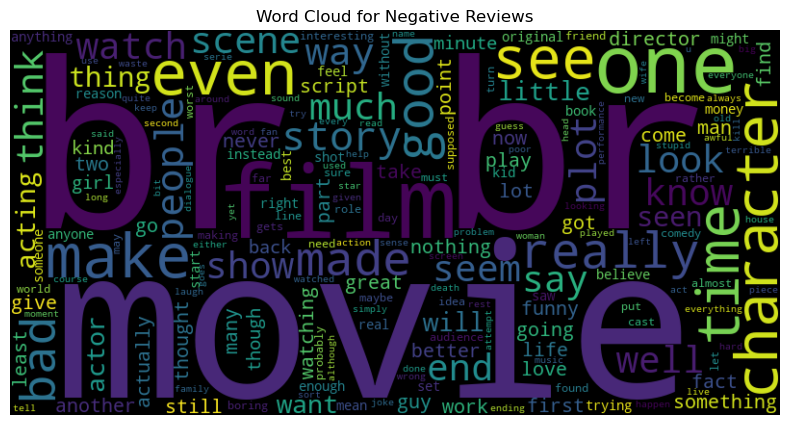

In [21]:
# Word cloud for negative reviews
negative_reviews = data[data['sentiment'] == 'negative']['review']
negative_text = ' '.join(negative_reviews)
negative_wordcloud = WordCloud(width=800, height=400).generate(negative_text)
plt.figure(figsize=(10, 5))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

#### Observation - This is a visual of the some of the most prevalent words in the Negative class. Words like : movie, bad and actor featured heavily. These terms are closely related to the domain of movies in relation to the Negaitive class.

## HYPOTHESIS TESTING

### Question: Is a significant difference in the average word count between positive and negative reviews

### H(0) - There is no significant difference in the average word count between positive and negative reviews 

### H(1)- There is a significant difference in the average word count between positive and negative reviews 

In [22]:
# Separate positive and negative reviews
positive_reviews = data[data['sentiment'] == 'positive']
negative_reviews = data[data['sentiment'] == 'negative']

# Calculate word count for each review
positive_reviews['word_count'] = positive_reviews['review'].apply(lambda x: len(x.split()))
negative_reviews['word_count'] = negative_reviews['review'].apply(lambda x: len(x.split()))

# Perform a two-sample t-test
t_stat, p_value = ttest_ind(positive_reviews['word_count'], negative_reviews['word_count'])

# Define the significance level (alpha)
alpha = 0.05

# Check the p-value
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in word count between positive and negative reviews.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in word count between positive and negative reviews.")


Reject the null hypothesis: There is a significant difference in word count between positive and negative reviews.


#### Observation - The Hypothesis test infers that the average number of words counts in the classification of the review.

### Question: Is there a significant association between sentiment (positive) and the presence of specific words like "amazing," "great," and "interesting" in movie reviews?

### Hypotheses:

### H(0): There is no significant association between sentiment and the presence of these specific words in movie reviews.
### H(1): There is a significant association between sentiment and the presence of these specific words in movie reviews.

In [23]:
# List of words to test
words_to_test = ["amazing", "great", "interesting"]

for word in words_to_test:
    # Calculate the count of positive reviews containing the word
    count_positive_word = len(data[(data['sentiment'] == 'positive') & data['review'].str.contains(word)])

    # Calculate the count of positive reviews without the word
    count_positive_without_word = len(data[(data['sentiment'] == 'positive') & ~data['review'].str.contains(word)])

    # Perform a chi-squared test for each word
    contingency_table = [[count_positive_word, count_positive_without_word],
                         [data['sentiment'].value_counts()['positive'] - count_positive_word, data['sentiment'].value_counts()['positive'] - count_positive_without_word]]

    chi2, p, _, _ = stats.chi2_contingency(contingency_table)

    # Print the results for each word
    print(f"Word: '{word}'")
    print(f"Count of positive reviews containing '{word}':", count_positive_word)
    print(f"Count of positive reviews without '{word}':", count_positive_without_word)
    print("Chi-squared statistic:", chi2)
    print("p-value:", p)

    # Perform a hypothesis test for each word
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis: There's a significant association between sentiment and '{word}'.")
    else:
        print(f"Fail to reject the null hypothesis: No significant association between sentiment and '{word}'.")
    
    # Add a separator for readability
    print("\n" + "=" * 50 + "\n")

Word: 'amazing'
Count of positive reviews containing 'amazing': 892
Count of positive reviews without 'amazing': 11608
Chi-squared statistic: 18369.796
p-value: 0.0
Reject the null hypothesis: There's a significant association between sentiment and 'amazing'.


Word: 'great'
Count of positive reviews containing 'great': 4375
Count of positive reviews without 'great': 8125
Chi-squared statistic: 2248.80016
p-value: 0.0
Reject the null hypothesis: There's a significant association between sentiment and 'great'.


Word: 'interesting'
Count of positive reviews containing 'interesting': 1263
Count of positive reviews without 'interesting': 11237
Chi-squared statistic: 15913.71664
p-value: 0.0
Reject the null hypothesis: There's a significant association between sentiment and 'interesting'.




#### Observation - This Hypothesis Test infers that the prevalence of the words in a review text could translate in a Positive Sentiment.

### Question: Is there a significant association between sentiment (negative) and the presence of specific words like "terrible," "boring," and "bad" in movie reviews?

### Hypotheses:

### H(0): There is no significant association between sentiment and the presence of these specific words in movie reviews.
### H(1): There is a significant association between sentiment and the presence of these specific words in movie reviews.

In [24]:
# List of words to test
words_to_test = ["terrible", "bad", "boring"]

for word in words_to_test:
    # Calculate the count of negative reviews containing the word
    count_negative_with_word = len(data[(data['sentiment'] == 'negative') & data['review'].str.contains(word)])

    # Calculate the count of negative reviews without the word
    count_negative_without_word = len(data[(data['sentiment'] == 'negative') & ~data['review'].str.contains(word)])

    # Perform a chi-squared test for each word
    contingency_table = [[count_negative_with_word, count_negative_without_word],
                         [data['sentiment'].value_counts()['negative'] - count_negative_with_word, data['sentiment'].value_counts()['negative'] - count_negative_without_word]]

    chi2, p, _, _ = stats.chi2_contingency(contingency_table)

    # Print the results for each word
    print(f"Word: '{word}'")
    print("Count of negative reviews containing the word:", count_negative_with_word)
    print("Count of negative reviews without the word:", count_negative_without_word)
    print("Chi-squared statistic:", chi2)
    print("p-value:", p)

    # Perform a hypothesis test for each word
    alpha = 0.05
    if p < alpha:
        print(f"Reject the null hypothesis: There's a significant association between sentiment and '{word}'.")
    else:
        print(f"Fail to reject the null hypothesis: No significant association between sentiment and '{word}'.")
    # Add a separator for readability
    print("\n" + "=" * 50 + "\n")

Word: 'terrible'
Count of negative reviews containing the word: 1056
Count of negative reviews without the word: 11444
Chi-squared statistic: 17262.36304
p-value: 0.0
Reject the null hypothesis: There's a significant association between sentiment and 'terrible'.


Word: 'bad'
Count of negative reviews containing the word: 4610
Count of negative reviews without the word: 7890
Chi-squared statistic: 1720.29456
p-value: 0.0
Reject the null hypothesis: There's a significant association between sentiment and 'bad'.


Word: 'boring'
Count of negative reviews containing the word: 1170
Count of negative reviews without the word: 11330
Chi-squared statistic: 16512.84496
p-value: 0.0
Reject the null hypothesis: There's a significant association between sentiment and 'boring'.




#### Observation - This Hypothesis Test infers that the prevalence of the words in a review text could translate in a Negative Sentiment.

  ## ANSWERING QUESTIONS

1. What is the distribution of sentiment labels in the movie reviews dataset, and how are they distributed among different sentiment categories?

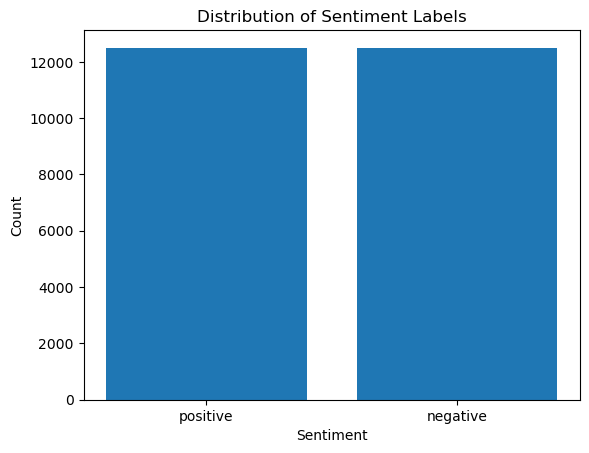

In [25]:
# Plot the distribution of sentiment labels
sentiment_counts = data['sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Sentiment Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Observation - The counts of the Sentiment class are leveled at about 12500

2. What does the distribution of word counts in movie reviews reveal about the length of reviews in the dataset?

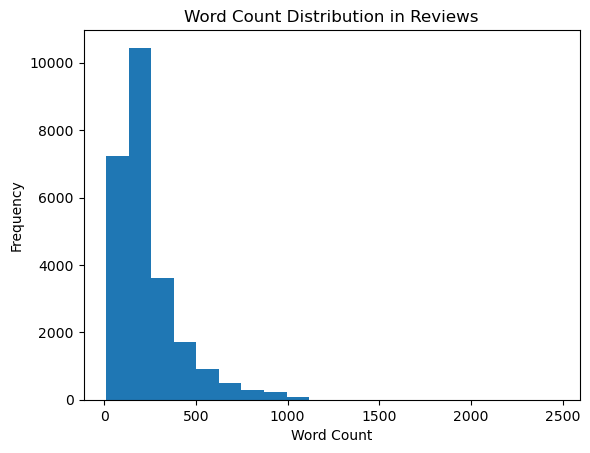

In [26]:
# Calculate word count for each review
data['word_count'] = data['review'].apply(lambda x: len(x.split()))

# Plot the word count distribution
plt.hist(data['word_count'], bins=20)
plt.title('Word Count Distribution in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

### Observation - Review with a word count between 100 and 500 featured an average of about 8000 times

3. How does the word count of movie reviews relate to their sentiment? Is there a noticeable difference in word count between positive and negative reviews?

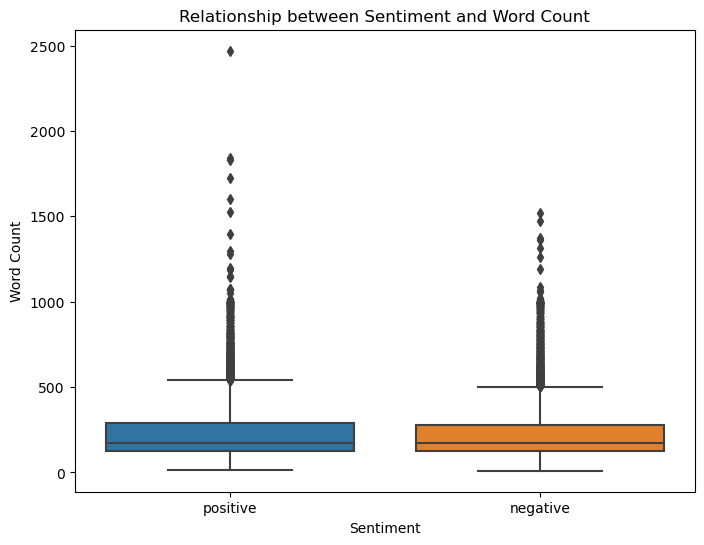

In [27]:
# Create a box plot to visualize the relationship between sentiment and word count
plt.figure(figsize=(8, 6))
sns.boxplot(x='sentiment', y='word_count', data=data)
plt.title('Relationship between Sentiment and Word Count')
plt.xlabel('Sentiment')
plt.ylabel('Word Count')
plt.show()

### Observation - The average word count of words within the Positive class was about 500 while the average count of words within the Negative class averaged about 400 words. We can infer that longer reviews are likely have Positive Sentiment.

## Feature Processing & Engineering

In [28]:
# Remove hashtags from the 'review' column
data['review'] = data['review'].str.replace(r'#\w+', '', regex=True)

#display dataframe
data

,review,sentiment,word_count
0,Recently shown on cable tv the movie opens wit...,positive,169
1,I was very surprised with this film. I was tou...,positive,127
2,"Now, I'm one to watch movies that got poor rev...",negative,165
3,"This film came out 12 years years ago, and was...",positive,275
4,"When an orphanage manager goes on vacation, hi...",positive,97
...,...,...,...
24995,"As with most of the reviewers, I saw this on S...",negative,607
24996,A have a female friend who is currently being ...,positive,201
24997,Like A Streetcar Named Desire (also directed b...,positive,148
24998,"As a Native film professor, I can honestly say...",negative,201


In [29]:
# Load spaCy
nlp = English()
stopwords = list(nlp.Defaults.stop_words)
punctuations = string.punctuation

In [30]:
# Preprocess the text 
data['review'] = data['review'].apply(lambda text: text.strip().lower())

In [31]:
# Tokenization, stopwords removal, and punctuation removal using spaCy
def process_text(text):
    doc = nlp(text)
    tokens = [token.text for token in doc if token.text not in stopwords and token.text not in punctuations]
    return ' '.join(tokens)

In [32]:
data.drop('word_count', axis=1, inplace=True)

In [33]:
data

,review,sentiment
0,recently shown on cable tv the movie opens wit...,positive
1,i was very surprised with this film. i was tou...,positive
2,"now, i'm one to watch movies that got poor rev...",negative
3,"this film came out 12 years years ago, and was...",positive
4,"when an orphanage manager goes on vacation, hi...",positive
...,...,...
24995,"as with most of the reviewers, i saw this on s...",negative
24996,a have a female friend who is currently being ...,positive
24997,like a streetcar named desire (also directed b...,positive
24998,"as a native film professor, i can honestly say...",negative


In [34]:
# Create a label encoder
label_encoder = LabelEncoder()

# Encode the 'sentiment' column in your DataFrame
data['sentiment'] = label_encoder.fit_transform(data['sentiment'])

data['sentiment'].unique


<bound method Series.unique of 0        1
1        1
2        0
3        1
4        1
        ..
24995    0
24996    1
24997    1
24998    0
24999    1
Name: sentiment, Length: 25000, dtype: int32>

## Data Splitting

In [35]:
# Split the data into training and testing sets
X = data['review']
y = data['sentiment']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Feature Encoding

In [37]:
X_train = X_train.apply(process_text)
X_test = X_test.apply(process_text)

In [38]:
# Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## TRAIN & EVALUATE MODEL

In [39]:
# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Classifier', 'Accuracy'])

# List of classifiers
classifiers = {
    "MultinomialNB": MultinomialNB(),
    "LogisticRegression": LogisticRegression(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC()  
}

# Train and evaluate each classifier
for clf_name, classifier in classifiers.items():

    # Fit the classifier on the training data
    classifier.fit(X_train_tfidf, y_train)

    # Predict the labels on the test data
    y_pred = classifier.predict(X_test_tfidf)

    # Calculate and print the accuracy score in percentage format
    accuracy = accuracy_score(y_test, y_pred) * 100
    print(f"Accuracy Score for {clf_name}: {accuracy:.0f}%\n")
    
    # Append the results to the DataFrame
    results_df = results_df.append({'Classifier': clf_name, 'Accuracy': accuracy}, ignore_index=True)

    # Print the classification report
    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report for {clf_name}:\n{class_report}\n")

# Sort the results DataFrame by accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)
results_df


Accuracy Score for MultinomialNB: 84%

Classification Report for MultinomialNB:
              precision    recall  f1-score   support

           0       0.85      0.84      0.84      2500
           1       0.84      0.85      0.85      2500

    accuracy                           0.84      5000
   macro avg       0.84      0.84      0.84      5000
weighted avg       0.84      0.84      0.84      5000


Accuracy Score for LogisticRegression: 87%

Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      2500
           1       0.86      0.89      0.88      2500

    accuracy                           0.87      5000
   macro avg       0.87      0.87      0.87      5000
weighted avg       0.87      0.87      0.87      5000


Accuracy Score for RandomForest: 84%

Classification Report for RandomForest:
              precision    recall  f1-score   support

           0       0.83      0.86      0.

,Classifier,Accuracy
3,SVC,87.56
1,LogisticRegression,87.34
0,MultinomialNB,84.48
2,RandomForest,84.42


## CONFUSION MATRIX

Confusion Matrix for MultinomialNB Distribution:
                 Predicted Negative  Predicted Positive
Actual Negative                2100                 400
Actual Positive                 376                2124


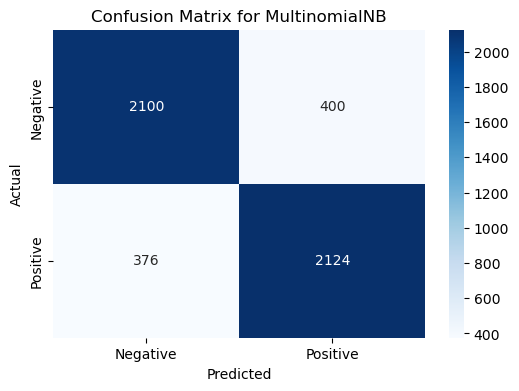

Confusion Matrix for LogisticRegression Distribution:
                 Predicted Negative  Predicted Positive
Actual Negative                2149                 351
Actual Positive                 282                2218


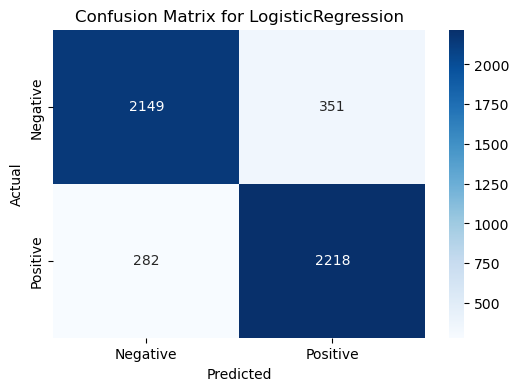

Confusion Matrix for RandomForest Distribution:
                 Predicted Negative  Predicted Positive
Actual Negative                2145                 355
Actual Positive                 416                2084


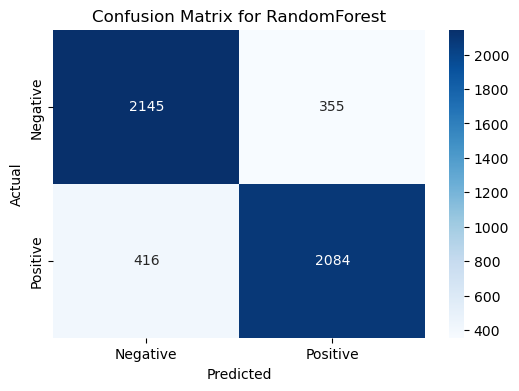

Confusion Matrix for SVC Distribution:
                 Predicted Negative  Predicted Positive
Actual Negative                2156                 344
Actual Positive                 278                2222


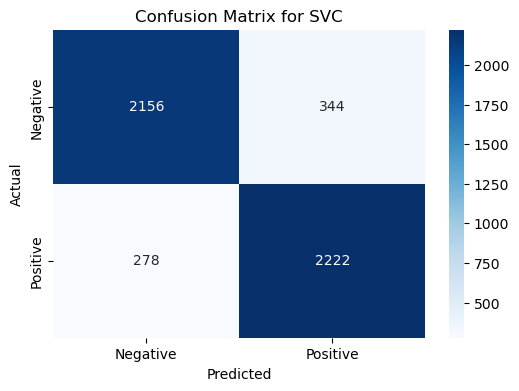

In [40]:
# Iterate through each classifier in the dictionary
for clf_name, classifier in classifiers.items():
    # Fit the classifier on the training data
    classifier.fit(X_train_tfidf, y_train)
    
    # Make predictions on the test data
    y_pred = classifier.predict(X_test_tfidf)
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Print the confusion matrix distribution
    print(f"Confusion Matrix for {clf_name} Distribution:")
    print(pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive']))

    # Plot the confusion matrix as a heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {clf_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

## HYPERPARAMETER TUNING

In [41]:
#Define the hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'penalty': ['l1', 'l2'] 
}

# Create the Logistic Regression model with specific parameters
logistic_classifier = LogisticRegression(solver='liblinear', max_iter=1000, random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(logistic_classifier, param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the final model with the best hyperparameters
best_classifier = LogisticRegression(solver='liblinear', max_iter=1000, **best_params)

best_classifier.fit(X_train_tfidf, y_train)

Best Hyperparameters: {'C': 1, 'penalty': 'l2'}


LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [42]:
# Make predictions on the test set using the tuned model
y_pred = best_classifier.predict(X_test_tfidf)

# Calculate and print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score after Hyperparameter Tuning: {accuracy:.2f}")

Accuracy Score after Hyperparameter Tuning: 0.87


## ROC CURVE

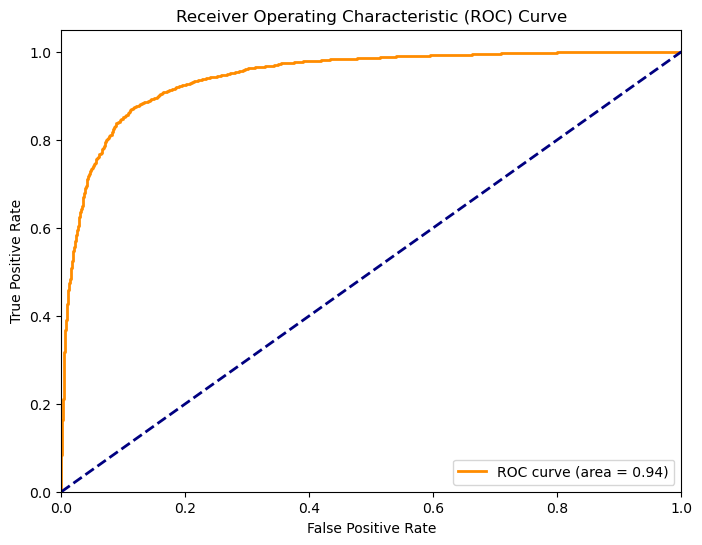

In [45]:
# Get the predicted probabilities for the positive class
y_prob = best_classifier.predict_proba(X_test_tfidf)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

#### Observation - AUC ≥ 0.9: The model has outstanding discriminative ability. An ROC curve with an AUC of 0.94 means that the model is quite effective in classifying data points correctly, and it is considered a strong performer in this binary classification tasks.

## EXPORTATION OF ML COMPONENT

In [46]:
# Create a dictionary to store the components and model
components_dict = {
    'cleaner': process_text,
    'cleaner_tfidf_vectorizer': tfidf_vectorizer,
    'cleaner_classifier': best_classifier
}

In [47]:
# Create a folder to store the exported data
folder_name = 'comp_folder'
os.makedirs(folder_name, exist_ok=True)

In [48]:
# Export the components and model
components_path = os.path.join(folder_name, 'sentiment_components.pkl')
with open(components_path, 'wb') as file:
    pickle.dump(components_dict, file)

In [49]:
# Generate the requirements.txt file
requirements_file = 'requirements.txt'
os.system(f'pip freeze > {os.path.join(folder_name, requirements_file)}')

0

In [50]:
# Zip the exported data folder
shutil.make_archive('exported_data', 'zip', 'exported_comp_folder')

print("Exported data has been zipped.")

Exported data has been zipped.


### Test Data

In [89]:
# Load the exported components from the file
components_path = 'comp_folder/sentiment_components.pkl'
with open(components_path, 'rb') as file:
    components_dict = pickle.load(file)

In [90]:
# Extract the loaded components
loaded_cleaner = components_dict['cleaner']
loaded_vectorizer = components_dict['cleaner_tfidf_vectorizer']
loaded_classifier = components_dict['cleaner_classifier']

In [91]:
# Load the new data from a CSV file
test_data

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."
...,...,...
24995,999_8.txt,"From the start of ""The Edge Of Love"", the view..."
24996,99_10.txt,"This movie, with all its complexity and subtle..."
24997,99_3.txt,Four things intrigued me as to this film - fir...
24998,9_4.txt,David Bryce's comments nearby are exceptionall...


In [92]:
test_data.rename(columns={'content': 'review'}, inplace=True)

In [93]:
files = test_data['review_file'].copy()

In [94]:
test_data.drop('review_file', axis=1, inplace=True)

In [95]:
test_data['review'] = test_data['review'].apply(lambda text: text.strip().lower())

In [96]:
# Apply text cleaning to the new data
test_data['review'] = test_data['review'].apply(loaded_cleaner)

# Vectorize the new data using the loaded vectorizer
X_new_tfidf = loaded_vectorizer.transform(test_data['review'])

# Make predictions on the new data
new_predictions = loaded_classifier.predict(X_new_tfidf)

In [103]:
# DataFrame for Predictions
prediction_results = pd.DataFrame({'review_files': files, 'Predict_Sentiment': new_predictions})

In [107]:
# Map predictions to "Positive" and "Negative"
prediction_results['Predict_Sentiment'] = prediction_results['Predict_Sentiment'].map({1: 'Positive', 0: 'Negative'})

In [108]:
prediction_results

,review_files,Predict_Sentiment
0,0_10.txt,Positive
1,0_2.txt,Negative
2,10000_4.txt,Negative
3,10000_7.txt,Positive
4,10001_1.txt,Negative
...,...,...
24995,999_8.txt,Positive
24996,99_10.txt,Positive
24997,99_3.txt,Negative
24998,9_4.txt,Positive


In [110]:
# Count the occurrences of "Positive" and "Negative" in the predictions
count = prediction_results['Predict_Sentiment'].value_counts()

print(count)

Positive    12601
Negative    12399
Name: Predict_Sentiment, dtype: int64


In [111]:
# Save the Predictions
prediction.to_csv('predicted_sentiment_results.csv', index=False)